In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/datos_paises.csv", sep=";")
print(df)


c:\Users\Sergio\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Sergio\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


                    País  Salario Promedio  Salario Promedio Jóvenes  \
0                  Suiza           4627.35                    4000.0   
1             Luxemburgo           4799.96                    3600.0   
2           Países Bajos           3172.58                    2800.0   
3               Alemania           2837.86                    2700.0   
4              Dinamarca           3419.34                    3500.0   
5                Noruega           3075.08                    3000.0   
6                Irlanda           2984.47                    2400.0   
7                 Suecia           2639.88                    2600.0   
8              Finlandia           2608.91                    2400.0   
9                Bélgica           2414.17                    2200.0   
10               Francia           2274.16                    2100.0   
11               Austria           2439.87                    2300.0   
12           Reino Unido           2780.28                    24

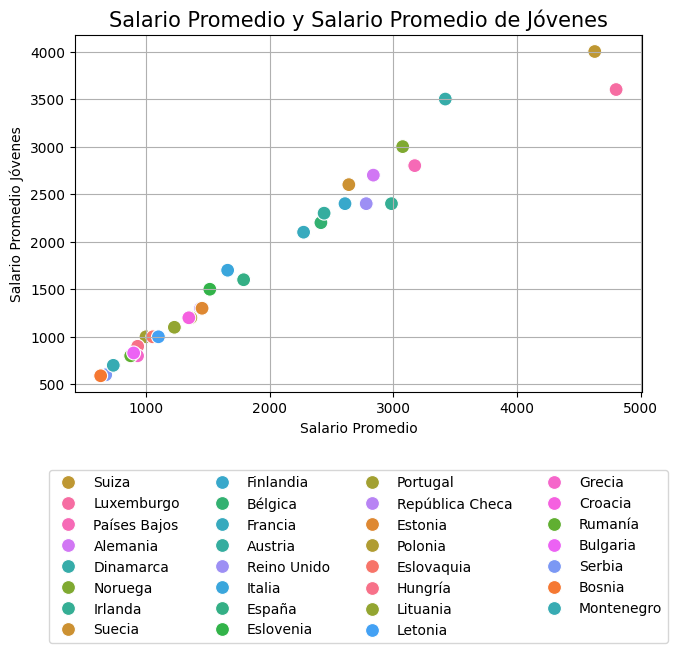

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos
df = pd.read_csv("data/datos_paises.csv", sep=";")

# Generar una lista de colores aleatorios
num_paises = df['País'].nunique()  # Número de países únicos

# Crear una paleta de colores aleatorios
paleta_colores = sns.color_palette("husl", num_paises)  # Usamos husl para generar colores variados
np.random.shuffle(paleta_colores)  # Reordenar la paleta aleatoriamente

# Crear la gráfica de dispersión con la nueva paleta
plt.figure(figsize=(7, 7))
scatter = sns.scatterplot(x='Salario Promedio', y='Salario Promedio Jóvenes', data=df, hue='País', s=100, palette=paleta_colores)

# Configurar el título y los ejes
plt.title('Salario Promedio y Salario Promedio de Jóvenes', fontsize=15)
plt.xlabel('Salario Promedio')
plt.ylabel('Salario Promedio Jóvenes')

# Mover la leyenda fuera de la gráfica, abajo
handles, labels = scatter.get_legend_handles_labels()  # Obtener los manejadores y etiquetas de la leyenda
# Reemplazar "Bosnia y Herzegovina" con "Bosnia"
labels = ['Bosnia' if label == 'Bosnia y Herzegovina' else label for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)  # Ajustar ncol para el número de columnas de la leyenda

# Mostrar la cuadrícula
plt.grid(True)

# Ajustar el diseño para que no se solape
plt.tight_layout()

# Mostrar la gráfica
plt.show()



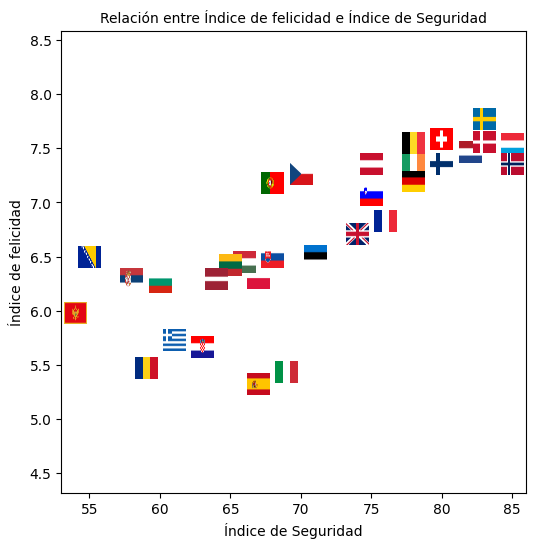

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

df.rename(columns={'Satisfacción de Vida': 'Índice de felicidad'}, inplace=True)
# Crear la gráfica
plt.figure(figsize=(6, 6))

# Configurar la gráfica con Seaborn (pero no dibujar los puntos todavía)
sns.scatterplot(x='Índice de Seguridad', y='Índice de felicidad', data=df, color='none', marker='none')

# Crear una lista para almacenar las posiciones utilizadas
used_positions = []

# Agregar las banderas
for index, row in df.iterrows():
    # Cambia la ruta a la carpeta donde tienes las banderas
    flag_image = mpimg.imread(f'banderas/{row["País"].lower()}.png')  # Asegúrate de que el nombre de la imagen sea el correcto
    
    # Ajustar el tamaño de la bandera
    x_center = row['Índice de Seguridad']
    y_center = row['Índice de felicidad']
    
    # Tamaño de la bandera (ajusta este valor según sea necesario)
    width = 1.6  # Ajusta el ancho de la bandera
    height = 0.2  # Ajusta la altura de la bandera

    # Inicializar el desplazamiento
    displacement = 0.0
    
    # Verificar si la posición actual está cerca de alguna posición ya usada
    for used_x, used_y in used_positions:
        # Ajustar la tolerancia según sea necesario
        if (abs(used_x - x_center) < 0.05) and (abs(used_y - y_center) < 0.05):
            displacement += 0.2  # Aumentar desplazamiento para la siguiente bandera

    # Aumentar el desplazamiento para Luxemburgo
    if row['País'] == 'Luxemburgo':
        displacement += 0.1  # Ajusta el valor del desplazamiento hacia arriba que deseas

    # Aumentar el desplazamiento para Luxemburgo
    if row['País'] == 'Alemania':
        displacement -= 0.06  # Ajusta el valor del desplazamiento hacia arriba que deseas

    # Agregar la posición actual a la lista de posiciones usadas
    used_positions.append((x_center, y_center))

    # Colocar la imagen de la bandera en las coordenadas correspondientes con desplazamiento
    plt.imshow(flag_image, aspect='auto', extent=(x_center - width / 2, x_center + width / 2,
                                                   y_center - height / 2 + displacement, y_center + height / 2 + displacement))

# Personalizar la gráfica
plt.title('Relación entre Índice de felicidad e Índice de Seguridad', fontsize=10)
plt.xlabel('Índice de Seguridad')
plt.ylabel('Índice de felicidad')
plt.grid(False)

# Mostrar la gráfica
plt.xlim(df['Índice de Seguridad'].min() - 1, df['Índice de Seguridad'].max() + 1)
plt.ylim(df['Índice de felicidad'].min() - 1, df['Índice de felicidad'].max() + 1)

plt.show()




### 3. Análisis de los países con mayor porcentaje de trabajadores extranjeros


C:\Users\Sergio\AppData\Local\Temp\ipykernel_20976\131629151.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  porcentaje.rename(columns={'Porcentaje de Trabajadores Extranjeros': '%'}, inplace=True)
C:\Users\Sergio\AppData\Local\Temp\ipykernel_20976\131629151.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  porcentaje.rename(columns={'Principales Países de Origen de Trabajadores Extranjeros': 'País Extranjeros'}, inplace=True)


Text(0.5, 1.0, 'Porcentaje de Trabajadores Extranjeros por País en Europa')

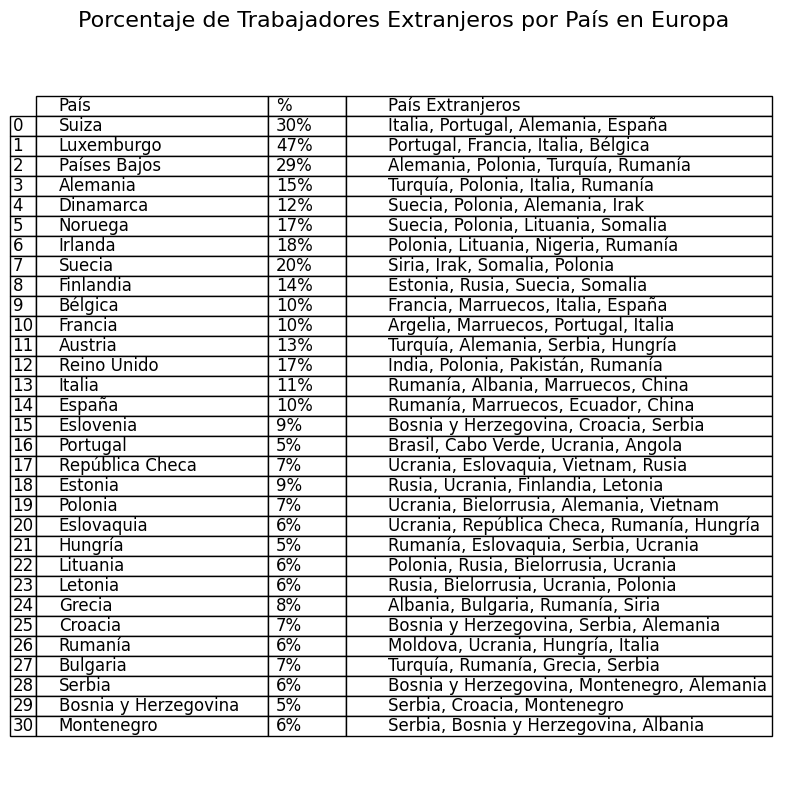

In [4]:
from pandas.plotting import table


porcentaje = df[['País','Porcentaje de Trabajadores Extranjeros','Principales Países de Origen de Trabajadores Extranjeros']]
porcentaje.rename(columns={'Porcentaje de Trabajadores Extranjeros': '%'}, inplace=True)
porcentaje.rename(columns={'Principales Países de Origen de Trabajadores Extranjeros': 'País Extranjeros'}, inplace=True)

# Configurar la figura para la tabla
fig, ax = plt.subplots(figsize=(10, 10))  # Ajustar tamaño de la figura (más ancho)

# Ocultar ejes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)  # Sin marco en la tabla

# Crear la tabla con el DataFrame
# Ajustar colWidths para darle más espacio a la columna 'País Extranjeros'
col_widths = [0.15, 0.15, 0.4]  # Asignar más ancho a la tercera columna
tabla = table(ax, porcentaje, loc='center', cellLoc='center', colWidths=col_widths)

# Ajustar el tamaño de la fuente y el escalado
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)  # Tamaño de letra
tabla.scale(1.2, 1.2)   # Escalar tabla

# Ajustar el formato de las celdas
for key, cell in tabla.get_celld().items():
    if key[1] == 2:  # Índice de la tercera columna ("País Extranjeros")
        cell.set_text_props(ha='left')  # Alinear el texto a la izquierda
        cell.set_width(0.55)  # Ampliar el ancho de la columna para texto largo
    if key[1] == 1:  # Índice de la tercera columna ("País Extranjeros")
        cell.set_text_props(ha='left')  # Alinear el texto a la izquierda
        cell.set_width(0.1)  # Ampliar el ancho de la columna para texto largo
    if key[1] == 0:  # Índice de la tercera columna ("País Extranjeros")
        cell.set_text_props(ha='left')  # Alinear el texto a la izquierda
        cell.set_width(0.3)  # Ampliar el ancho de la columna para texto largo

# Añadir un título
plt.title('Porcentaje de Trabajadores Extranjeros por País en Europa', fontsize=16, pad=0)


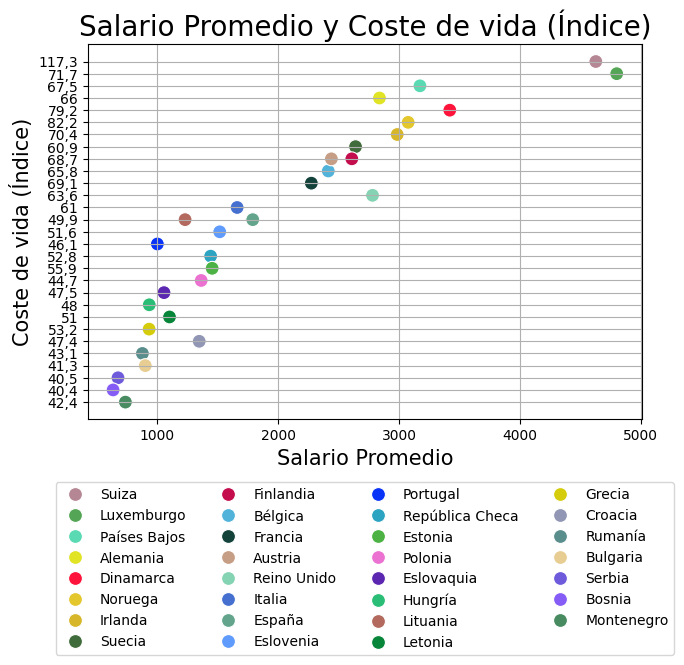

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos
df = pd.read_csv("data/datos_paises.csv", sep=";")

# Lista de diferentes marcadores de relleno
markers = ['o', 's', '^', 'D', 'P', '*', 'x', '+', '<', '>']  # Solo marcadores válidos y de tipo relleno
unique_countries = df['País'].unique()

# Crear un diccionario de marcadores basado en los países
marker_dict = {country: markers[i % len(markers)] for i, country in enumerate(unique_countries)}

# Generar colores aleatorios para cada país
colors = np.random.rand(len(unique_countries), 3)  # Colores en RGB
color_dict = {country: colors[i] for i, country in enumerate(unique_countries)}

# Crear la gráfica de dispersión
plt.figure(figsize=(7, 7))  # Aumentar el tamaño de la figura
scatter = sns.scatterplot(
    x='Salario Promedio',
    y='Coste de vida (Índice)',
    data=df,
    hue='País',
    palette=color_dict,
    style=None,
    markers=marker_dict,
    s=100,
    hue_order=unique_countries  # Asegurar el orden de los colores en la leyenda
)

# Configurar el título y los ejes
plt.title('Salario Promedio y Coste de vida (Índice)', fontsize=20)  # Aumentar el tamaño de la fuente del título
plt.xlabel('Salario Promedio', fontsize=15)  # Aumentar el tamaño de la fuente del eje X
plt.ylabel('Coste de vida (Índice)', fontsize=15)  # Aumentar el tamaño de la fuente del eje Y

# Mover la leyenda fuera de la gráfica, abajo
handles, labels = scatter.get_legend_handles_labels()  # Obtener los manejadores y etiquetas de la leyenda
# Reemplazar "Bosnia y Herzegovina" con "Bosnia"
labels = ['Bosnia' if label == 'Bosnia y Herzegovina' else label for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4, fontsize=10)  # Ajustar tamaño de la fuente de la leyenda

# Mostrar la cuadrícula
plt.grid(True)

# Ajustar el diseño para que no se solape
plt.tight_layout()  

# Mostrar la gráfica
plt.show()



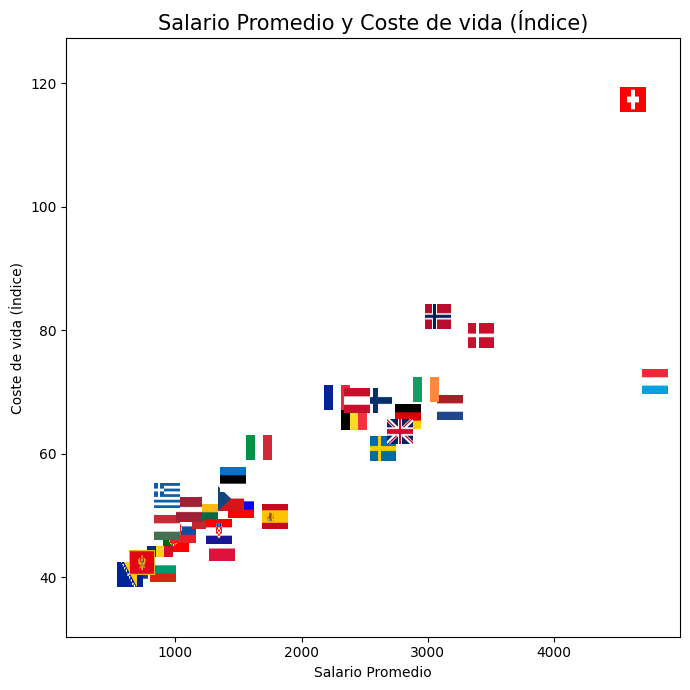

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

# Cargar los datos
df = pd.read_csv("data/datos_paises.csv", sep=";")

# Reemplazar comas por puntos en 'Coste de vida (Índice)' y convertir a numérico
df['Coste de vida (Índice)'] = df['Coste de vida (Índice)'].str.replace(',', '.')
df['Coste de vida (Índice)'] = pd.to_numeric(df['Coste de vida (Índice)'], errors='coerce')

# Ahora también puedes querer hacer lo mismo para 'Salario Promedio Jóvenes' si aplica
df['Salario Promedio Jóvenes'] = df['Salario Promedio Jóvenes'].astype(str).str.replace(',', '.')
df['Salario Promedio Jóvenes'] = pd.to_numeric(df['Salario Promedio Jóvenes'], errors='coerce')

# Ahora elimina filas con NaN
df = df.dropna(subset=['Salario Promedio', 'Coste de vida (Índice)'])



# Crear la gráfica
plt.figure(figsize=(7, 7))

# Configurar la gráfica con un scatterplot invisible
plt.scatter(df['Salario Promedio'], df['Coste de vida (Índice)'], color='none', marker='none')

# Crear una lista para almacenar las posiciones utilizadas
used_positions = []

# Agregar las banderas
for index, row in df.iterrows():
    # Cambia la ruta a la carpeta donde tienes las banderas
    flag_path = f'banderas/{row["País"].lower()}.png'
    if not os.path.exists(flag_path):
        print(f"Imagen no encontrada: {flag_path}")
        continue  # Saltar si la imagen no se encuentra

    flag_image = mpimg.imread(flag_path)  # Cargar la imagen

    # Ajustar el tamaño de la bandera
    x_center = row['Salario Promedio']
    y_center = row['Coste de vida (Índice)']
    
    # Tamaño de la bandera (ajusta este valor según sea necesario)
    width = 200 # Ancho de la bandera
    height = 4  # Altura de la bandera

    # Inicializar el desplazamiento
    displacement = 0.0
    
    # Verificar si la posición actual está cerca de alguna posición ya usada
    for used_x, used_y in used_positions:
        # Ajustar la tolerancia según sea necesario
        if (abs(used_x - x_center) < 0.05) and (abs(used_y - y_center) < 0.05):
            displacement += 0.2  # Aumentar desplazamiento para la siguiente bandera

    # Agregar la posición actual a la lista de posiciones usadas
    used_positions.append((x_center, y_center))

    # Colocar la imagen de la bandera en las coordenadas correspondientes con desplazamiento
    plt.imshow(flag_image, aspect='auto', extent=(x_center - width / 2, x_center + width / 2,
                                                   y_center - height / 2 + displacement, y_center + height / 2 + displacement))

# Personalizar la gráfica
plt.title('Salario Promedio y Coste de vida (Índice)', fontsize=15)
plt.xlabel('Salario Promedio')
plt.ylabel('Coste de vida (Índice)')
plt.grid(False)

# Establecer límites de los ejes
plt.xlim(df['Salario Promedio'].min() - 500, df['Salario Promedio'].max() + 200)
plt.ylim(df['Coste de vida (Índice)'].min() - 10, df['Coste de vida (Índice)'].max() + 10)
# Mostrar la gráfica
plt.tight_layout()
plt.show()


Uso de K-means para clasificar los países en los mejores para vivir

c:\Users\Sergio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


                    País  Salario Promedio  Salario Promedio Jóvenes  \
0                  Suiza           4627.35                    4000.0   
1             Luxemburgo           4799.96                    3600.0   
2           Países Bajos           3172.58                    2800.0   
3               Alemania           2837.86                    2700.0   
4              Dinamarca           3419.34                    3500.0   
5                Noruega           3075.08                    3000.0   
6                Irlanda           2984.47                    2400.0   
7                 Suecia           2639.88                    2600.0   
8              Finlandia           2608.91                    2400.0   
9                Bélgica           2414.17                    2200.0   
10               Francia           2274.16                    2100.0   
11               Austria           2439.87                    2300.0   
12           Reino Unido           2780.28                    24

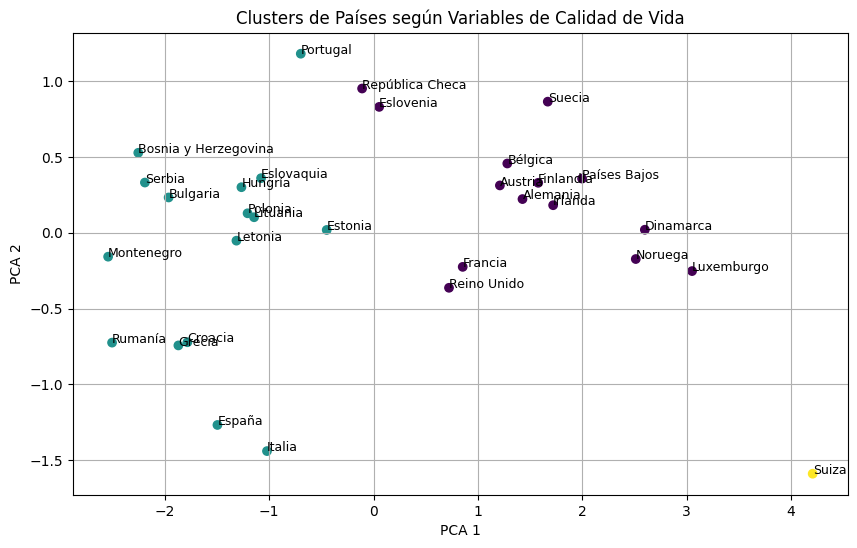

In [7]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionar las columnas que queremos usar para el clustering
variables = ['Salario Promedio', 'Coste de vida (Índice)', 'Satisfacción de Vida', 'Índice de Seguridad']

# Normalizar los datos
scaler = StandardScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df[variables]), columns=variables)

# Aplicar K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_normalizado)

# Mostrar resultados
print(df)

# Visualización: PCA para reducir dimensiones a 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(df_normalizado)
df['PCA1'] = pca_df[:, 0]
df['PCA2'] = pca_df[:, 1]

# Visualizar clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
for i, txt in enumerate(df['País']):
    plt.annotate(txt, (df['PCA1'][i], df['PCA2'][i]), fontsize=9)
plt.title('Clusters de Países según Variables de Calidad de Vida')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.show()


C:\Users\Sergio\AppData\Local\Temp\ipykernel_20976\1987015851.py:53: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle(pos, 0.15, color=color, alpha=0.5, lw=2, edgecolor='black')


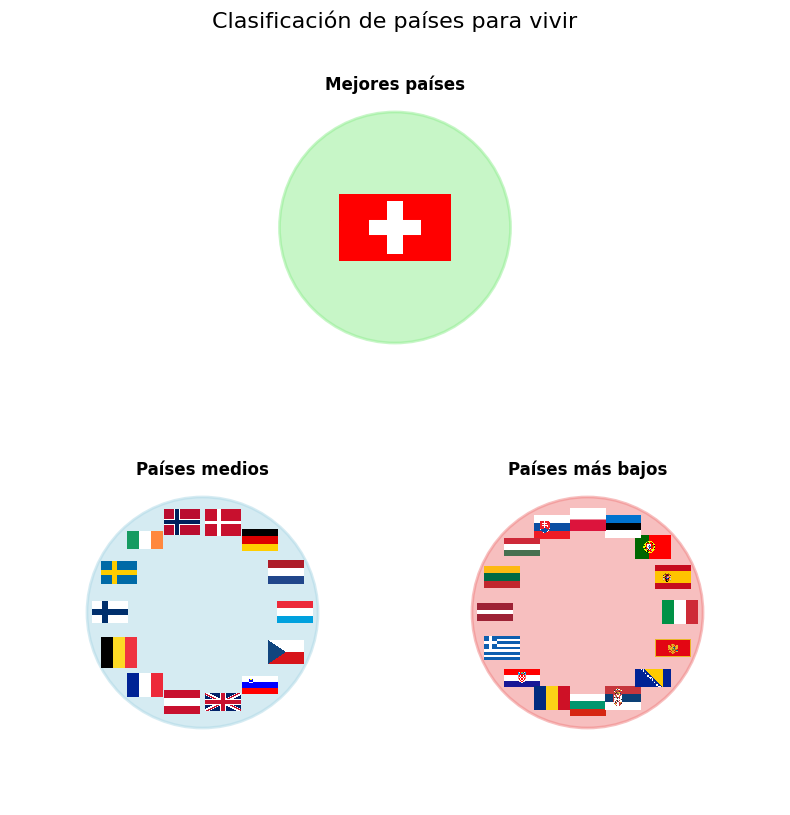

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os
import numpy as np

# Crear una figura
fig, ax = plt.subplots(figsize=(10, 10))

# Definir posiciones de los círculos (uno en la parte superior, dos en las esquinas inferiores)
circle_positions = [(0.5, 0.75), (0.25, 0.25), (0.75, 0.25)]  # Centro superior, esquina inferior izquierda, esquina inferior derecha
circle_labels = ['Mejores países', 'Países medios', 'Países más bajos']

# Colores de los círculos (opcional)
circle_colors = ['lightgreen', 'lightblue', 'lightcoral']

# Función para insertar la imagen de la bandera dentro de un círculo de manera radial
def add_flag_image_radial(country_name, circle_center, radius, ax, index, total_countries, folder_path='banderas'):
    # Crear la ruta de la bandera
    image_path = os.path.join(folder_path, f'{country_name}.png')
    
    try:
        img = mpimg.imread(image_path)  # Leer la imagen de la bandera
        
        # Calcular el ángulo y la posición de la bandera de forma radial
        angle = 2 * np.pi * (index / total_countries)
        x = circle_center[0] + radius * np.cos(angle)
        y = circle_center[1] + radius * np.sin(angle)

        # Ajustar el tamaño de la bandera
        imagebox = OffsetImage(img, zoom=0.01)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False)
        ax.add_artist(ab)  # Añadir la bandera
    except FileNotFoundError:
        print(f'Bandera no encontrada: {country_name}')

# Función para añadir la bandera al centro del círculo
def add_flag_image_center(country_name, circle_center, ax, zoom=0.15, folder_path='banderas'):
    # Crear la ruta de la bandera
    image_path = os.path.join(folder_path, f'{country_name}.png')
    
    try:
        img = mpimg.imread(image_path)  # Leer la imagen de la bandera
        imagebox = OffsetImage(img, zoom=zoom)  # Aumentar el tamaño de la bandera
        ab = AnnotationBbox(imagebox, circle_center, frameon=False)
        ax.add_artist(ab)  # Añadir la bandera al centro
    except FileNotFoundError:
        print(f'Bandera no encontrada: {country_name}')

# Dibujar los círculos y añadir banderas radialmente
for i, (pos, label, color) in enumerate(zip(circle_positions, circle_labels, circle_colors)):
    # Dibujar círculo
    circle = plt.Circle(pos, 0.15, color=color, alpha=0.5, lw=2, edgecolor='black')
    ax.add_artist(circle)

    # Añadir texto del nombre del círculo (etiqueta)
    plt.text(pos[0], pos[1] + 0.18, label, horizontalalignment='center', fontsize=12, weight='bold')

# Añadir la bandera en el centro del círculo si hay solo un país en el cluster de mejores países
if len(mejores_paises) == 1:
    add_flag_image_center(mejores_paises[0], (0.5, 0.75), ax, zoom=0.10)  # Hacer la bandera más grande en el centro
else:
    # Si hay más países, añadir las banderas radialmente
    for i, country in enumerate(mejores_paises):
        add_flag_image_radial(country, (0.5, 0.75), 0.12, ax, i, len(mejores_paises))  # Círculo en el centro superior

# Añadir banderas radialmente para los otros dos clusters
for i, country in enumerate(paises_medios):
    add_flag_image_radial(country, (0.25, 0.25), 0.12, ax, i, len(paises_medios))  # Círculo en la esquina inferior izquierda

for i, country in enumerate(paises_bajos):
    add_flag_image_radial(country, (0.75, 0.25), 0.12, ax, i, len(paises_bajos))  # Círculo en la esquina inferior derecha

# Ajustar límites del gráfico y ocultar ejes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')  # Ocultar los ejes

# Mostrar imagen
plt.title('Clasificación de países para vivir', fontsize=16)
plt.show()


    Salario Promedio  Salario Promedio Jóvenes  Satisfacción de Vida  \
0            4627.35                    4000.0                 7.586   
1            4799.96                    3600.0                 7.437   
2            3172.58                    2800.0                 7.464   
3            2837.86                    2700.0                 7.261   
4            3419.34                    3500.0                 7.556   
5            3075.08                    3000.0                 7.353   
6            2984.47                    2400.0                 7.392   
7            2639.88                    2600.0                 7.571   
8            2608.91                    2400.0                 7.349   
9            2414.17                    2200.0                 7.352   
10           2274.16                    2100.0                 6.826   
11           2439.87                    2300.0                 7.352   
12           2780.28                    2400.0                 6

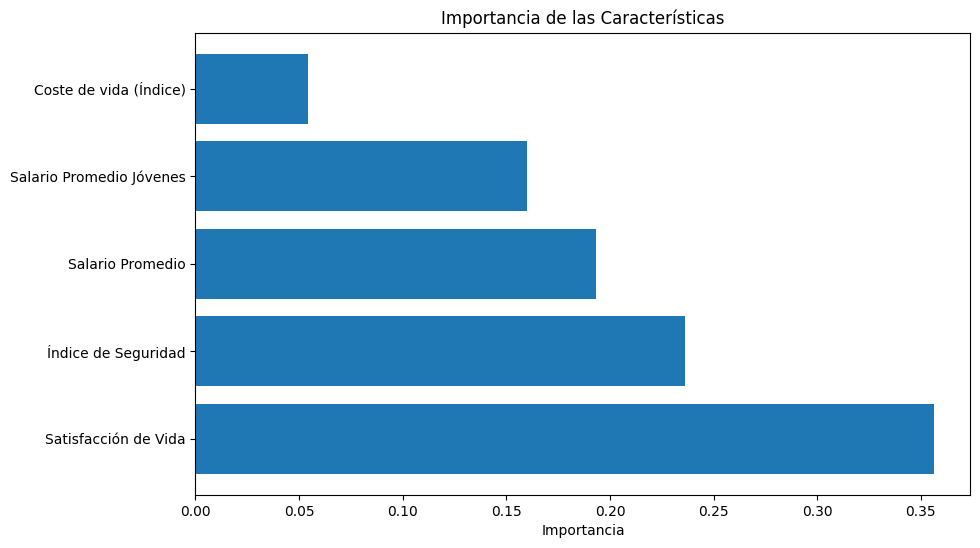

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar los datos
df = pd.read_csv('data/datos_paises.csv', sep=";")  # Cambia esto por la ruta de tu archivo
# Variables independientes (features)
X = df[['Salario Promedio', 'Salario Promedio Jóvenes', 'Satisfacción de Vida', 'Índice de Seguridad', 'Coste de vida (Índice)']]

# Reemplazar comas por puntos y eliminar espacios en las columnas relevantes
columns_to_convert = ['Salario Promedio', 'Salario Promedio Jóvenes', 'Satisfacción de Vida', 'Índice de Seguridad', 'Coste de vida (Índice)']

for column in columns_to_convert:
    # Convertir a string y reemplazar comas por puntos
    df[column] = df[column].astype(str).str.replace(',', '.', regex=False).str.strip()

# Convertir columnas a tipo numérico
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Normalizar las variables (escala entre 0 y 1)
df['Salario Promedio_norm'] = (df['Salario Promedio'] - df['Salario Promedio'].min()) / (df['Salario Promedio'].max() - df['Salario Promedio'].min())
df['Salario Promedio Jóvenes_norm'] = (df['Salario Promedio Jóvenes'] - df['Salario Promedio Jóvenes'].min()) / (df['Salario Promedio Jóvenes'].max() - df['Salario Promedio Jóvenes'].min())
df['Satisfacción de Vida_norm'] = (df['Satisfacción de Vida'] - df['Satisfacción de Vida'].min()) / (df['Satisfacción de Vida'].max() - df['Satisfacción de Vida'].min())
df['Índice de Seguridad_norm'] = (df['Índice de Seguridad'] - df['Índice de Seguridad'].min()) / (df['Índice de Seguridad'].max() - df['Índice de Seguridad'].min())
df['Coste de vida (Índice)_norm'] = (df['Coste de vida (Índice)'].max() - df['Coste de vida (Índice)']) / (df['Coste de vida (Índice)'].max() - df['Coste de vida (Índice)'].min())  # Inverso

# Calcular el Índice de Calidad de Vida
df['Índice de Calidad de Vida'] = (
    df['Salario Promedio_norm'] +
    df['Salario Promedio Jóvenes_norm'] +
    df['Satisfacción de Vida_norm'] +
    df['Índice de Seguridad_norm'] +
    df['Coste de vida (Índice)_norm']
) / 5  # Media simple

# Clasificar en categorías
conditions = [
    (df['Índice de Calidad de Vida'] > 0.8),
    (df['Índice de Calidad de Vida'] > 0.6) & (df['Índice de Calidad de Vida'] <= 0.8),
    (df['Índice de Calidad de Vida'] > 0.4) & (df['Índice de Calidad de Vida'] <= 0.6),
    (df['Índice de Calidad de Vida'] <= 0.4)
]

# Definir las etiquetas
labels = ['Excelente', 'Buena', 'Promedio', 'Mala']

# Crear la nueva columna de categoría
df['Categoría Calidad de Vida'] = pd.cut(df['Índice de Calidad de Vida'], bins=[-1, 0.4, 0.6, 0.8, 1], labels=labels)

# Mostrar el dataframe resultante
print(df[['Salario Promedio', 'Salario Promedio Jóvenes', 'Satisfacción de Vida', 'Índice de Seguridad', 'Coste de vida (Índice)', 'Índice de Calidad de Vida', 'Categoría Calidad de Vida']])
# Variable dependiente (target)
# Asegúrate de que tienes una columna con categorías de calidad de vida, por ejemplo:
y = df['Categoría Calidad de Vida']  # Cambia esto según tu variable dependiente

# Preparar las características y la variable objetivo
X = df[columns_to_convert]
# Supongamos que tienes una columna de etiquetas llamada 'Categoría Calidad de Vida'
y = df['Categoría Calidad de Vida']  # Cambia esto si es necesario

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestClassifier()  # Ajusta los parámetros si es necesario
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Mostrar las predicciones (opcional)
print("Predicciones del modelo:")
print(y_pred)

# Importancia de las características
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

# Visualización de la importancia de las características
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características')
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), feature_names[sorted_indices])
plt.xlabel('Importancia')
plt.show()


c:\Users\Sergio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sergio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sergio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Sergio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

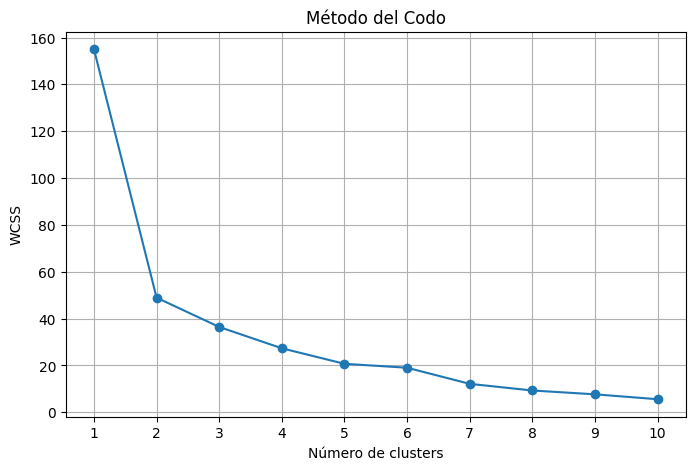

c:\Users\Sergio\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


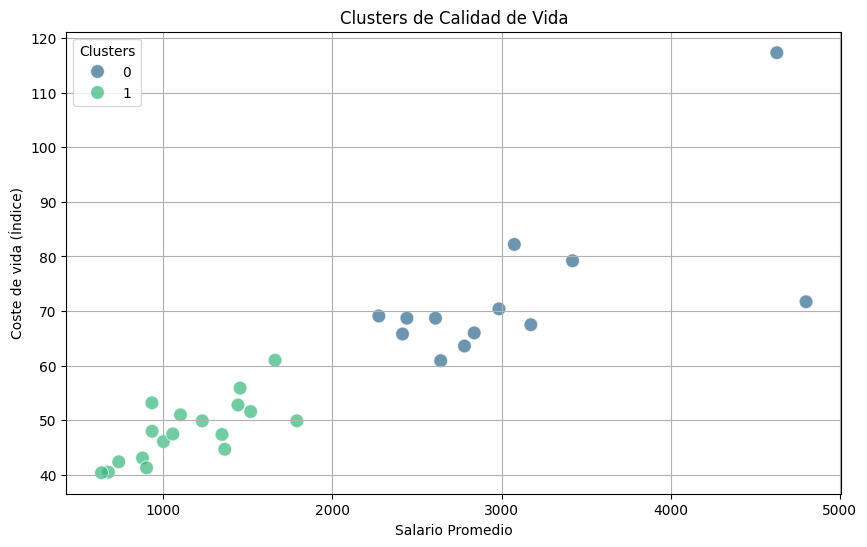

Características medias por cluster:
         Salario Promedio  Salario Promedio Jóvenes  Satisfacción de Vida  \
Cluster                                                                     
0             3082.608462               2769.230769              7.323231   
1             1146.998333               1062.222222              6.256222   

         Índice de Seguridad  Coste de vida (Índice)  
Cluster                                               
0                  79.769231               73.161538  
1                  64.444444               48.150000  


In [39]:
# Seleccionar las características para el clustering
X = df[columns_to_convert]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar el número óptimo de clusters usando el método del codo
wcss = []
for i in range(1, 11):  # Probar entre 1 y 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.xticks(range(1, 11))
plt.grid()
plt.show()

# Elegir un número óptimo de clusters (supongamos que se elige 3)
optimal_clusters = 2

# Ajustar el modelo K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Graficar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Salario Promedio', y='Coste de vida (Índice)', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters de Calidad de Vida')
plt.xlabel('Salario Promedio')
plt.ylabel('Coste de vida (Índice)')
plt.legend(title='Clusters')
plt.grid()
plt.show()

# Mostrar las características medias por cluster
print("Características medias por cluster:")
print(df.groupby('Cluster')[columns_to_convert].mean())